One of the main tasks in Exploratory Data Analysis (EDA) is to explore how differernt preprocessing strategies may affect relatoinships between feature or some metric (e.g. classification accuracy). In this tutorial, I will show how to do this easily with _Xplore_ functionalities.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor
import seaborn as sns

from xplore import Xplorer, read_pipeline, eval_models, plot_models

%matplotlib inline

In [20]:
# import os
# import tarfile
# from six.moves import urllib

# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
# HOUSING_PATH = "data"
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

# fetch_housing_data()

In [21]:
calif = Xplorer(df='data/housing.csv', y='median_house_value')
calif.fix_types(col_types={'ocean_proximity': 'category'})
calif.encode_categorical_feature(col='ocean_proximity')
calif.impute_nans()
calif.freeze_and_save_pipeline('calif_raw')

In [22]:
def baseline_pipeline(name):
    pipe = read_pipeline(name)
    return pipe

In [23]:
calif = baseline_pipeline('calif_raw')
calif.replace_outlier()
calif.impute_nans()
calif.scale_feature()

Cannot log read_data properly.


In [24]:
calif.log

["self.read_data(df='data/housing.csv')",
 "self.set_target(y='median_house_value')",
 "self.fix_types(col_types={'ocean_proximity': 'category'})",
 "self.encode_categorical_feature(col=['ocean_proximity'])",
 "self.fix_types(col_types={'ocean_proximity_<1H OCEAN': 'category', 'ocean_proximity_INLAND': 'category', 'ocean_proximity_ISLAND': 'category', 'ocean_proximity_NEAR BAY': 'category', 'ocean_proximity_NEAR OCEAN': 'category'})",
 "self.fix_types(col_types={'ocean_proximity_<1H OCEAN': 'category', 'ocean_proximity_INLAND': 'category', 'ocean_proximity_ISLAND': 'category', 'ocean_proximity_NEAR BAY': 'category', 'ocean_proximity_NEAR OCEAN': 'category'})",
 "self.impute_nans(col=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],method='median')",
 "

In [25]:
calif.freeze_and_save_pipeline('calif_minimal_preprocessing')

# Compare different models

In [26]:
tags = ['calif_raw', 'calif_minimal_preprocessing']
eda_objs = [(name,read_pipeline(name)) for name in tags]
clf = [('RF',RandomForestRegressor()),
        ('Ridge',Ridge())
      ]
accs = eval_models(eda_objs, clf)

Cannot log read_data properly.
Cannot log read_data properly.


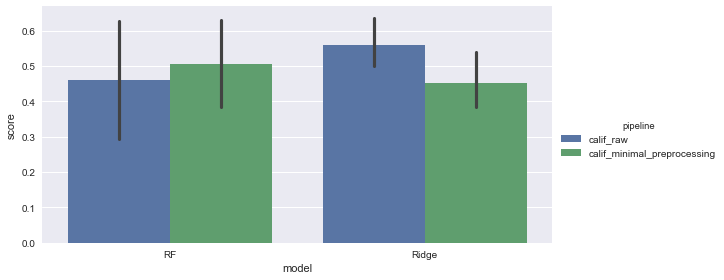

In [27]:
#plot_models(accs)
cv_df = pd.DataFrame(accs, columns=['model','pipeline', 'score'])
cv_df['score'].values[cv_df['score'].values<0] = 0.
sns.factorplot(x='model',y='score', hue='pipeline', data=cv_df, kind='bar', size=4, aspect=2)

In [28]:
cv_df.groupby(['model','pipeline']).agg(np.mean)

score
model pipeline                             
RF    calif_minimal_preprocessing  0.505694
      calif_raw                    0.460088
Ridge calif_minimal_preprocessing  0.452318
      calif_raw                    0.559590

# Experiment differnt types of scaling

In [29]:
scaling_type = ['minmax_scale', 'scale', 'maxabs_scale']
tags = []
for ix, st in enumerate(scaling_type):
    calif_scale = baseline_pipeline('calif_raw')
    calif_scale.scale_feature(scaling=st)
    tag = '_'.join(['calif_scale', str(ix+1)])
    calif_scale.freeze_and_save_pipeline(tag)
    tags.append(tag)
tags.append('calif_raw')

Cannot log read_data properly.
Cannot log read_data properly.
Cannot log read_data properly.


In [30]:
eda_objs = [(name,read_pipeline(name)) for name in tags]
clf = [('RF',RandomForestRegressor()),
       ('Ridge',Ridge()),
       ('MLP', MLPRegressor())
      ]
accs = eval_models(eda_objs, clf)

Cannot log read_data properly.
Cannot log read_data properly.
Cannot log read_data properly.
Cannot log read_data properly.


/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/Home/anaconda/envs/dlnd/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceW

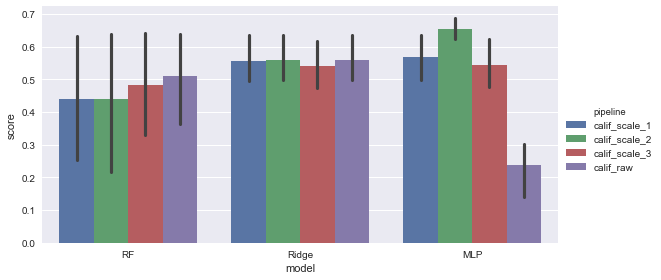

In [31]:
cv_df = pd.DataFrame(accs, columns=['model','pipeline', 'score'])
sns.factorplot(x='model',y='score', hue='pipeline', data=cv_df, kind='bar', size=4, aspect=2)

In [32]:
cv_df.groupby(['model','pipeline']).agg([np.mean,np.std])

score          
                         mean       std
model pipeline                         
MLP   calif_raw      0.239000  0.110903
      calif_scale_1  0.567454  0.088932
      calif_scale_2  0.654912  0.045448
      calif_scale_3  0.545449  0.096018
RF    calif_raw      0.510031  0.174061
      calif_scale_1  0.439622  0.251762
      calif_scale_2  0.439977  0.274542
      calif_scale_3  0.482196  0.205342
Ridge calif_raw      0.559590  0.087993
      calif_scale_1  0.557027  0.089214
      calif_scale_2  0.559574  0.088011
      calif_scale_3  0.539418  0.092100

# Synthesize more features

In [33]:
calif = baseline_pipeline('calif_raw')
calif.transform_feature(col=['population','households','total_rooms','total_bedrooms',
                             'median_income'], 
                        func_str='lambda x: np.log1p(x)')

calif.freeze_and_save_pipeline('calif_all_log')

Cannot log read_data properly.


In [34]:
calif = baseline_pipeline('calif_raw')

#calif.transform_feature(col=['population','households','total_rooms','total_bedrooms','median_income'], func_str='lambda x: np.log1p(x)')

calif.transform_feature(col=['population','households'], func_str='lambda x: x[0]/x[1]', 
                        new_col_name='pop_per_houshold', addtional_params={'axis':1})
calif.transform_feature(col=['total_bedrooms','total_rooms'], func_str='lambda x: x[0]/x[1]', 
                        new_col_name='bedrooms_per_rooms', addtional_params={'axis':1})
calif.transform_feature(col=['total_rooms','households'], func_str='lambda x: x[0]/x[1]', 
                        new_col_name='rooms_per_houshold', addtional_params={'axis':1})

calif.freeze_and_save_pipeline('calif_new_features')

Cannot log read_data properly.


In [35]:
tags = ['calif_raw','calif_new_features', 'calif_all_log']
eda_objs = [(name,read_pipeline(name)) for name in tags]
clf = [('RF',RandomForestRegressor()),
       ('Ridge',Ridge())
      ]
accs = eval_models(eda_objs, clf)

Cannot log read_data properly.
Cannot log read_data properly.
Cannot log read_data properly.


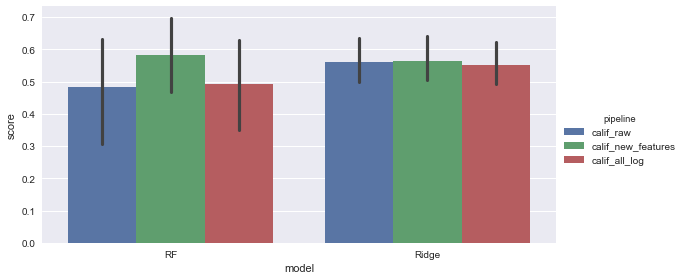

In [36]:
cv_df = pd.DataFrame(accs, columns=['model','pipeline', 'score'])
#cv_df['score'].values[cv_df['score'].values<0] = 0.
sns.factorplot(x='model',y='score', hue='pipeline', data=cv_df, kind='bar', size=4, aspect=2)